In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Call Libraries**

In [2]:

import pandas as pd

# 1.1 Call libraries for image processing
#     Another preprocessing option is text and sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

# 1.2, Libraries for building sequential CNN model
#      A model is composed of sequence of layered objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input, BatchNormalization


from tensorflow.keras import backend as K

# 1.4 Save CNN model configuration
from tensorflow.keras.models import model_from_json

# 1.5 OS related
import os

# 1.6 For ROC plotting
import matplotlib.pyplot as plt

# 1.7
import numpy as np
# conda install scikit-learn
from sklearn import metrics
import time
#from skimage import exposure           # Not used



**Define Constants**

In [3]:
img_width, img_height = 224, 224

## 1. Model with padding in the initial convolution layers

In [4]:
model = tf.keras.Sequential() 
model.add(Input(shape=(224,224,3)),)
model.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size=(3,3),strides=1 , activation ='relu',))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 256 , kernel_size=(3,3),strides=1 , activation ='relu',padding ='same'))
model.add(tf.keras.layers.Conv2D(filters = 512 , kernel_size=(3,3),strides=1 , activation ='relu',padding ='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters = 256 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512 , activation ='relu'))
model.add(tf.keras.layers.Dense(units=128 , activation ='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 256)     295168    
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 512)     1180160   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 512)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 53, 53, 128)       5

image augmentation of training data

In [7]:
train_gen = ImageDataGenerator(
                           brightness_range=[0.3,0.9],
                        shear_range=10 ,
                        horizontal_flip=True,
                         featurewise_center = False,
                        zca_whitening=False,
                         width_shift_range=0.1 ,
                         height_shift_range=0.1
)



train_iter = train_gen.flow_from_directory( directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train" , 
                            target_size=(img_height,img_width), 
                            batch_size=32,
                            class_mode='binary')


val_gen = ImageDataGenerator(rescale = 1.0/255.0)

val_iter = val_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/val",
                                     target_size=(img_height,img_width),
                                     batch_size=8,
                                    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [8]:
history = model.fit(train_iter,
          epochs=12 ,
          validation_data=val_iter)

Epoch 1/12
163/163 [==============================] - 222s 1s/step - loss: 4.0690 - accuracy: 0.7387 - val_loss: 0.8085 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 150s 916ms/step - loss: 0.4099 - accuracy: 0.8090 - val_loss: 0.9528 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 151s 925ms/step - loss: 0.2622 - accuracy: 0.8951 - val_loss: 1.7646 - val_accuracy: 0.5000
Epoch 4/12
163/163 [==============================] - 150s 920ms/step - loss: 0.2146 - accuracy: 0.9179 - val_loss: 2.9953 - val_accuracy: 0.5000
Epoch 5/12
163/163 [==============================] - 151s 923ms/step - loss: 0.1978 - accuracy: 0.9281 - val_loss: 2.9509 - val_accuracy: 0.5000
Epoch 6/12
163/163 [==============================] - 152s 930ms/step - loss: 0.1670 - accuracy: 0.9346 - val_loss: 3.0524 - val_accuracy: 0.5000
Epoch 7/12
163/163 [==============================] - 156s 958ms/step - loss: 0.1573 - accuracy: 0.9452 - val_loss: 3.1121 - va

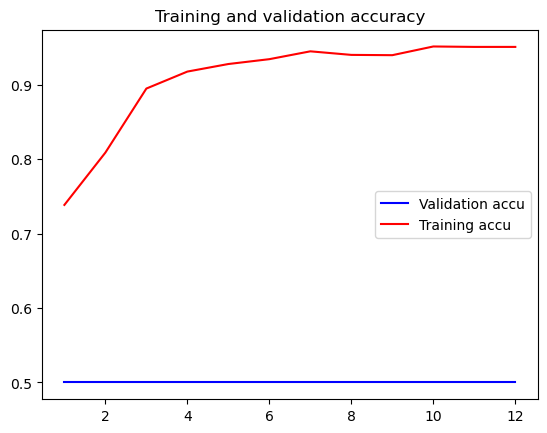

In [9]:

def plot_history():
    val_acc = history.history['val_accuracy']
    tr_acc=history.history['accuracy']
    epochs = range(1, len(val_acc) +1)
    plt.plot(epochs,val_acc, 'b', label = "Validation accu")
    plt.plot(epochs, tr_acc, 'r', label = "Training accu")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.show()

plot_history()

In [10]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_iter = test_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/test",
                                     target_size=(img_height,img_width),
                                     batch_size=16,
                            class_mode='binary')

Found 624 images belonging to 2 classes.


In [11]:
pred = model.predict(test_iter, steps = 39)

39/39 [==============================] - 17s 275ms/step


In [12]:
len(pred)

624

In [13]:
pred.min() 
print("======")
pred.max()

0.68959546

0.98563737

The prediction for the 624 test samples have varied between 89.7% and 99.99% .

Text(0.5, 1.0, 'preditions on test data')

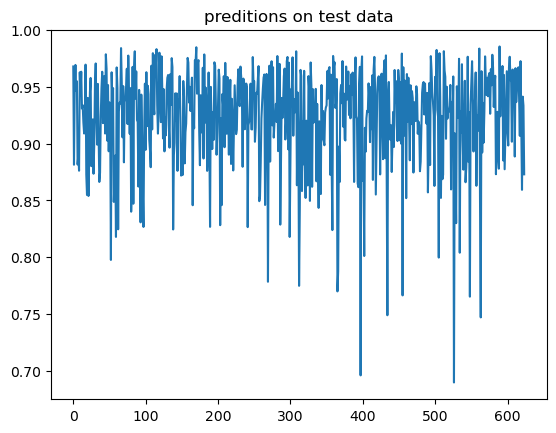

In [14]:
import matplotlib.pyplot as pp
pp.plot(pred)
pp.title("preditions on test data")
pp.show()

most predictions have been around 50% accuracy

## 2. Model having additonal convolution layers



In [15]:
model = tf.keras.Sequential() 
model.add(Input(shape=(224,224,3)),)
model.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size=(3,3),strides=1 , activation ='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 256 , kernel_size=(3,3),strides=(1,1) , activation ='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(filters = 512 , kernel_size=(3,3),strides=1 , activation ='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 256 , kernel_size=(3,3),strides=(1,1) , activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters = 512 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size=(3,3),strides=(1,1) , activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters = 256 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3,3),strides=(1,1) , activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512 , activation ='relu'))
model.add(tf.keras.layers.Dense(units=128 , activation ='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 128)    0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 512)     1180160   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 512)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 54, 54, 256)      

In [18]:
train_gen = ImageDataGenerator(
                           brightness_range=[0.3,0.9],
                        shear_range=10 ,
                        horizontal_flip=True,
                         featurewise_center = False,
                        zca_whitening=False,
                         width_shift_range=0.1 ,
                         height_shift_range=0.1
)

train_iter = train_gen.flow_from_directory( directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train" , 
                            target_size=(img_height,img_width), 
                            batch_size=32,
                            class_mode='binary')

val_gen = ImageDataGenerator(rescale = 1.0/255.0)

val_iter = val_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/val",
                                     target_size=(img_height,img_width),
                                     batch_size=8,
                                    class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [19]:
history = model.fit(train_iter,
          epochs=12,
          validation_data=val_iter)

Epoch 1/12
163/163 [==============================] - 183s 952ms/step - loss: 1.4067 - accuracy: 0.7260 - val_loss: 0.7393 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 154s 940ms/step - loss: 0.6114 - accuracy: 0.7289 - val_loss: 0.7110 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 152s 930ms/step - loss: 0.4884 - accuracy: 0.7803 - val_loss: 0.8064 - val_accuracy: 0.5000
Epoch 4/12
163/163 [==============================] - 151s 924ms/step - loss: 0.3672 - accuracy: 0.8430 - val_loss: 0.7881 - val_accuracy: 0.5000
Epoch 5/12
163/163 [==============================] - 152s 930ms/step - loss: 0.3076 - accuracy: 0.8704 - val_loss: 0.9109 - val_accuracy: 0.5000
Epoch 6/12
163/163 [==============================] - 152s 931ms/step - loss: 0.2610 - accuracy: 0.9007 - val_loss: 0.8896 - val_accuracy: 0.5000
Epoch 7/12
163/163 [==============================] - 153s 934ms/step - loss: 0.2510 - accuracy: 0.9045 - val_loss: 0.8154 -

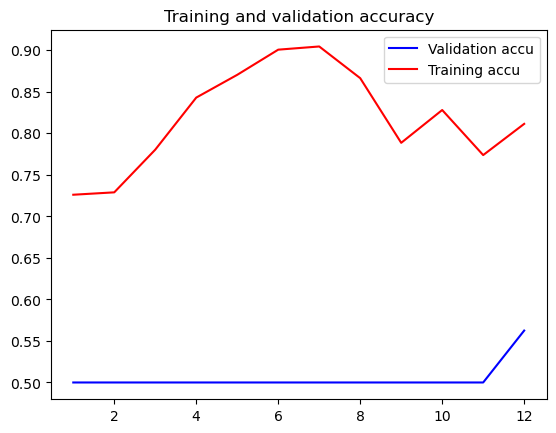

In [20]:

def plot_history():
    val_acc = history.history['val_accuracy']
    tr_acc=history.history['accuracy']
    val_loss=history.history['val_loss']
    epochs = range(1, len(val_acc) +1)
    plt.plot(epochs,val_acc, 'b', label = "Validation accu")
    plt.plot(epochs, tr_acc, 'r', label = "Training accu")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.show()

plot_history()

In [21]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_iter = test_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/test",
                                     target_size=(img_height,img_width),
                                     batch_size=16,
                            class_mode='binary')

Found 624 images belonging to 2 classes.


In [22]:
pred = model.predict(test_iter, steps = 39)

39/39 [==============================] - 15s 190ms/step


In [23]:
pred.min() 
print("======")
pred.max()

0.05320994

0.9846981

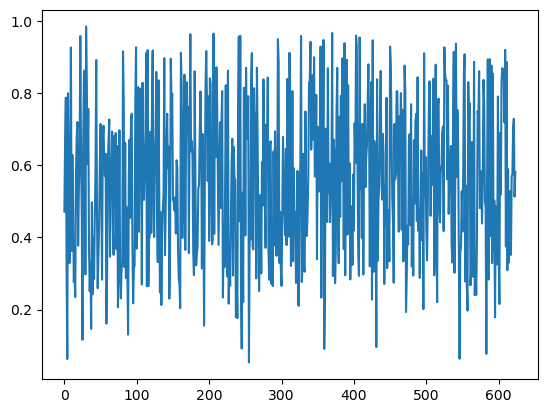

In [24]:
import matplotlib.pyplot as pp
pp.plot(pred)
pp.show()

This model has produced a a prediction percentage of 75 % , which is better than Model1

## 3.Model with batchnormalization and dropouts embedded

In [25]:
model = tf.keras.Sequential() 
model.add(Input(shape=(224,224,3)),)
model.add(BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 256 , kernel_size=(3,3),strides=(1,1) , activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters = 512 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 256 , kernel_size=(3,3),strides=(1,1) , activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters = 512 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size=(3,3),strides=(1,1) , activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters = 256 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3,3),strides=(1,1) , activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size=(3,3),strides=1 , activation ='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128 , activation ='relu'))
model.add(tf.keras.layers.Dense(units=64 , activation ='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d_16 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 256)     295168    
                                                                 
 conv2d_18 (Conv2D)          (None, 107, 107, 512)     1180160   
                                                                 
 dropout (Dropout)           (None, 107, 107, 512)    

below imagedatagenerator used shear_range and brightness_range unlike earlier 2 models.

In [28]:
train_gen = ImageDataGenerator(
                           brightness_range=[0.3,0.9],
                        shear_range=10 ,
                        horizontal_flip=True,
                         featurewise_center = False,
                        zca_whitening=False,
                         width_shift_range=0.1 ,
                         height_shift_range=0.1
)

train_iter = train_gen.flow_from_directory( directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train" , 
                            target_size=(img_height,img_width), 
                            batch_size=32,
                            class_mode='binary')

val_gen = ImageDataGenerator(rescale = 1.0/255.0)

val_iter = val_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/val",
                                     target_size=(img_height,img_width),
                                     batch_size=8,
                                    class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [29]:
history = model.fit(train_iter,epochs=12,validation_data=val_iter)

Epoch 1/12


2023-03-13 18:05:56.153167: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


163/163 [==============================] - 198s 1s/step - loss: 0.4673 - accuracy: 0.7713 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 168s 1s/step - loss: 0.3586 - accuracy: 0.8455 - val_loss: 0.7551 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 170s 1s/step - loss: 0.2920 - accuracy: 0.8746 - val_loss: 0.9155 - val_accuracy: 0.5000
Epoch 4/12
163/163 [==============================] - 168s 1s/step - loss: 0.2509 - accuracy: 0.8884 - val_loss: 0.8824 - val_accuracy: 0.5000
Epoch 5/12
163/163 [==============================] - 167s 1s/step - loss: 0.2416 - accuracy: 0.9039 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 6/12
163/163 [==============================] - 172s 1s/step - loss: 0.2274 - accuracy: 0.9080 - val_loss: 4.3238 - val_accuracy: 0.5000
Epoch 7/12
163/163 [==============================] - 173s 1s/step - loss: 0.2166 - accuracy: 0.9153 - val_loss: 0.7034 - val_accuracy: 0.5000
Epoch 8/12

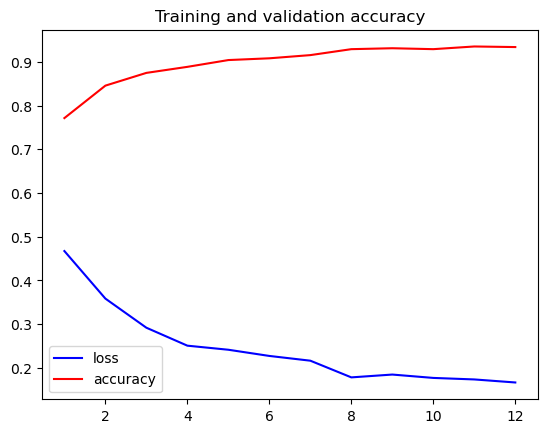

In [30]:

def plot_history():
    loss = history.history['loss']
    accuracy=history.history['accuracy']
    epochs = range(1, len(accuracy) +1)
    plt.plot(epochs,loss, 'b', label = "loss")
    plt.plot(epochs, accuracy, 'r', label = "accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.show()

plot_history()

In [31]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_iter = test_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/test",
                                     target_size=(img_height,img_width),
                                     batch_size=16,
                            class_mode='binary')

Found 624 images belonging to 2 classes.


In [32]:
pred = model.predict(test_iter, steps = 39)

39/39 [==============================] - 15s 203ms/step


In [33]:
pred.min()
print("======")
pred.max()

0.80640274

0.8150674

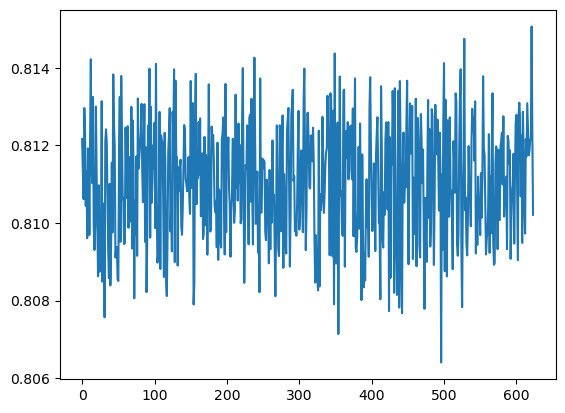

In [34]:
import matplotlib.pyplot as pp
pp.plot(pred)
pp.show()

This model has a 78% success rate and is better than model 1 and 2 . 

Having studied the other models created by other users of kaggle for the same problem , I realized that models with fewer convolution layers , starting with smaller input size and filters have shown better performance. Hence I have tried the following model on same lines.

### 4.Model with fewer convolution layers and embedded dropouts after flattening.

In [35]:
model = tf.keras.Sequential() 
model.add(Input(shape=(150, 150, 3)),)
model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu',strides=1))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(filters= 128,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 128)       

In [38]:
train_gen = ImageDataGenerator(
                          brightness_range=[0.3,0.9],
                        shear_range=10 ,
                        horizontal_flip=True,
                         featurewise_center = False,
                        zca_whitening=False,
                         width_shift_range=0.1 ,
                         height_shift_range=0.1
)



train_iter = train_gen.flow_from_directory( directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train" , 
                            target_size=(150,150), 
                            batch_size=32,
                            class_mode='binary')

val_gen = ImageDataGenerator(rescale = 1.0/255.0)
val_iter = val_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/val",
                                     target_size=(150,150),
                                     batch_size=8,
                                    class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [39]:
history = model.fit(train_iter,
          epochs=12 ,
          validation_data=val_iter)

Epoch 1/12
163/163 [==============================] - 96s 569ms/step - loss: 0.6561 - accuracy: 0.7354 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 96s 587ms/step - loss: 0.3373 - accuracy: 0.8508 - val_loss: 0.7228 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 93s 570ms/step - loss: 0.2684 - accuracy: 0.8909 - val_loss: 0.7090 - val_accuracy: 0.5000
Epoch 4/12
163/163 [==============================] - 93s 568ms/step - loss: 0.2546 - accuracy: 0.9064 - val_loss: 0.7598 - val_accuracy: 0.5000
Epoch 5/12
163/163 [==============================] - 94s 575ms/step - loss: 0.2099 - accuracy: 0.9216 - val_loss: 0.7914 - val_accuracy: 0.5000
Epoch 6/12
163/163 [==============================] - 94s 574ms/step - loss: 0.2050 - accuracy: 0.9193 - val_loss: 0.7995 - val_accuracy: 0.5000
Epoch 7/12
163/163 [==============================] - 93s 572ms/step - loss: 0.1988 - accuracy: 0.9256 - val_loss: 0.8113 - val_ac

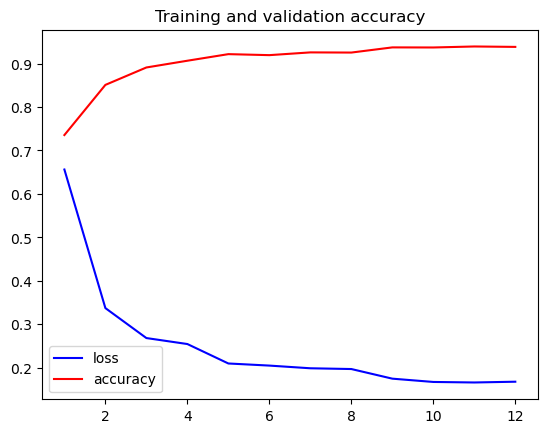

In [40]:

def plot_history():
    loss = history.history['loss']
    accuracy=history.history['accuracy']
    epochs = range(1, len(accuracy) +1)
    plt.plot(epochs,loss, 'b', label = "loss")
    plt.plot(epochs, accuracy, 'r', label = "accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.show()

plot_history()

In [41]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_iter = test_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/test",
                                     target_size=(img_height,img_width),
                                     batch_size=16,
                            class_mode='binary')

Found 624 images belonging to 2 classes.


In [42]:
pred = model.predict(test_iter, steps = 39)

39/39 [==============================] - 7s 177ms/step


In [43]:
pred.min()
print("======")
pred.max()

0.7931798

0.8377137

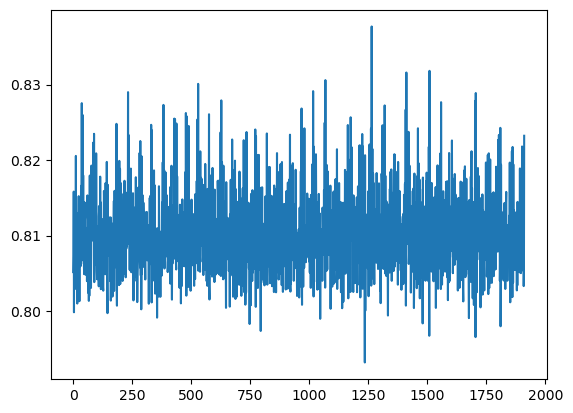

In [44]:
import matplotlib.pyplot as pp
pp.plot(pred)
pp.show()

This model has produced most predictions above 80% with minimum being 77.6%. This model has been the most consistent

 ## 5 . Model containing droputs after Maxpooling

In [45]:
model = tf.keras.Sequential() 
model.add(Input(shape=(150, 150, 3)),)
model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu',strides=1))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(filters= 128,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 18, 18, 64)       

In [48]:
train_gen = ImageDataGenerator(
                          brightness_range=[0.3,0.9],
                        shear_range=10 ,
                        horizontal_flip=True,
                         featurewise_center = False,
                        zca_whitening=False,
                         width_shift_range=0.1 ,
                         height_shift_range=0.1
)



train_iter = train_gen.flow_from_directory( directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train" , 
                            target_size=(150,150), 
                            batch_size=32,
                            class_mode='binary')

val_gen = ImageDataGenerator(rescale = 1.0/255.0)
val_iter = val_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/val",
                                     target_size=(150,150),
                                     batch_size=8,
                                    class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [49]:
history = model.fit(train_iter,
          epochs=12 ,
          validation_data=val_iter)

Epoch 1/12


2023-03-13 19:00:39.723473: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


163/163 [==============================] - 97s 576ms/step - loss: 1.0558 - accuracy: 0.7042 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 94s 578ms/step - loss: 0.5453 - accuracy: 0.7439 - val_loss: 0.7018 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 94s 576ms/step - loss: 0.4263 - accuracy: 0.8100 - val_loss: 0.7197 - val_accuracy: 0.5000
Epoch 4/12
163/163 [==============================] - 92s 566ms/step - loss: 0.3335 - accuracy: 0.8625 - val_loss: 0.7406 - val_accuracy: 0.5000
Epoch 5/12
163/163 [==============================] - 93s 573ms/step - loss: 0.3019 - accuracy: 0.8742 - val_loss: 0.7499 - val_accuracy: 0.5000
Epoch 6/12
163/163 [==============================] - 94s 579ms/step - loss: 0.2726 - accuracy: 0.8890 - val_loss: 0.7825 - val_accuracy: 0.5000
Epoch 7/12
163/163 [==============================] - 93s 570ms/step - loss: 0.2583 - accuracy: 0.9024 - val_loss: 0.7890 - val_accuracy: 0.5

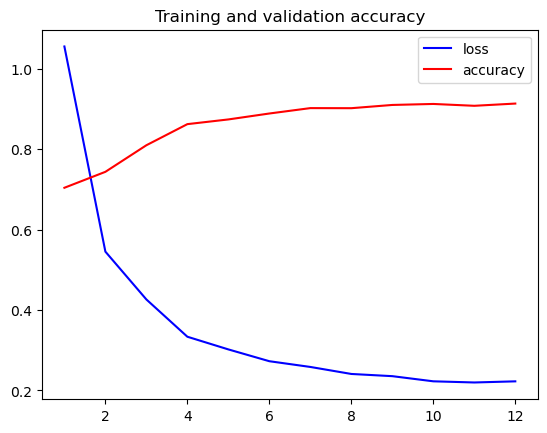

In [50]:

def plot_history():
    loss = history.history['loss']
    accuracy=history.history['accuracy']
    epochs = range(1, len(accuracy) +1)
    plt.plot(epochs,loss, 'b', label = "loss")
    plt.plot(epochs, accuracy, 'r', label = "accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.show()

plot_history()

In [51]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_iter = test_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/test",
                                     target_size=(img_height,img_width),
                                     batch_size=16,
                            class_mode='binary')

Found 624 images belonging to 2 classes.


In [52]:
pred = model.predict(test_iter, steps = 39)

39/39 [==============================] - 8s 202ms/step


In [53]:
pred.min()
print("======")
pred.max()

0.6979961

0.8490996

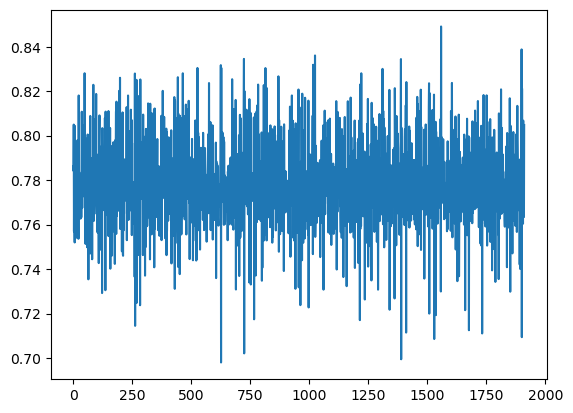

In [54]:
import matplotlib.pyplot as pp
pp.plot(pred)
pp.show()

This model has produced prediction success rate of over 84% for most test samples.